Boucle globale de lecture de vidéo


state= 0
    img_calibration
    obstacle detection
    start and goal
    global_nav
    
state = 1
    img_calibration
    detect Thymio
    astolfi ou local nav
    
    

In [1]:
#lancer la communication asynchrone avec thymio
from tdmclient import ClientAsync, aw
client = ClientAsync()
node = await client.wait_for_node()
await node.lock()

#vérifier d'avoir installer pyserial

Node eb16048f-962c-44b2-9651-cc3b67bca83b

# Initialisation

In [2]:
#check each import if it's really necessary
import cv2 
import time
import numpy as np
from PIL import Image 
import math
import matplotlib
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt

#import from global control
#import from glocal + control
import pyvisgraph as vg
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Polygon, Point, LineString
import time

In [3]:
import Vision as vis
import Global as glob
import control as ctrl
import local_nav as local

# fonction et classe filtering
from kalman_step_astolfi import kalman_step_complet
from EKF_astolfi import ExtendedKalmanFilterAstolfi

In [4]:
#pour le test utilise une image mais en vrai relier à la caméra et temps réel

cap=cv2.VideoCapture(1,cv2.CAP_DSHOW)

for i in range (5):
    _, frame = cap.read()
    time.sleep(1)
    print("frame {}".format(i))

cap.release()


#img_final= cv2.flip(img_final, 0)
img_final2 = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
corner_coord=vis.find_corners(img_final2)
img=vis.img_calibration(img_final2,corner_coord)
#cv2.imwrite('warpped.png', zzz)
plt.figure()
plt.imshow(img)
plt.show()



frame 0


KeyboardInterrupt: 

In [ ]:
#obstacle detection
polygons=vis.obstacle_detection(img)
#Start and goal detection
start=vis.detectCircle(img,'start')
goal=vis.detectCircle(img,'goal')

In [ ]:
#plot the visibility graph

#a voir si on le met dedans
margin = 35
path=glob.global_pathplanning(start,goal,polygons,margin)


# Control and navigation loop

In [ ]:
#cap=cv2.VideoCapture(0)

In [ ]:
cap=cv2.VideoCapture(1,cv2.CAP_DSHOW)

for i in range (5):
    _, frame = cap.read()
    time.sleep(1)
    print("frame {}".format(i))

cap.release()
    
#frame=vis.img_calibration(frame)
    
plt.figure()
plt.imshow(frame)
plt.show()

In [ ]:
#img_final = cv2.imread(frame)
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#img= cv2.flip(img, 0)
final=vis.img_calibration(img)
plt.figure()
plt.imshow(final)
plt.show()

In [4]:
def initialisation(pic):
    #obstacle detection
    polygons=vis.obstacle_detection(pic)
    #Start and goal detection
    start=vis.detectCircle(pic,'start')
    goal=vis.detectCircle(pic,'goal')
    init=[start,goal,polygons]
    return init



In [5]:
def printThymio(posThym, coordThym):
    coordThym.append((round(pos_thym[0]),round(pos_thym[1]))) #pos_thym = [x,y]
    for i in range(0,len(coordThym)):
        cv2.circle(final,(int(coordThym[i][0]),int(coordThym[i][1])), int(3), (0,255,255), 2)

In [6]:
def printThymioKalm(posThym, coordThym):    #la couleur de la trace change
 #   print("print dans thymkalm")
 #   print(posThym[0])
 #   print("prochain round: ")
 #   print(round(posThym[0]))
    coordThym.append((round(posThym[0]),round(posThym[1]))) #pos_thym = [x,y]
    for i in range(0,len(coordThym)):
        cv2.circle(final,(int(coordThym[i][0]),int(coordThym[i][1])), int(3), (0,0,255), 2)

In [7]:
#convertir frame to real => mm/s vitesse et position

#coefficients for the Astolfi controller (distances in millimeter)
r=22
l=48 
kp=25  #2 #>0
ka=50  #must be > kp
kb=-0.0001 #<0

#coeff_commtoreal=0,38

#astolfi return to iterate on the next goal from the path list

def astolfi(actual_pos, goal_pos, actual_angle, node):
    #déplacer les variables à l'extérieur dans control
    switch_next=0
    thresh_close2=10
    thresh_close1=75
    comm_sat_min=100
    comm_sat_max=250
    
    delta=np.subtract(goal_pos,actual_pos)
    pho=np.sqrt(np.sum(np.square(delta)))
    alpha=-actual_angle + np.arctan2(-delta[1],delta[0])
    beta=-actual_angle-alpha
    v=kp*pho
    if(pho<thresh_close1):
        v=comm_sat_min*r
    if(pho<thresh_close2):
        v=0
        switch_next=1      
    omega=ka*alpha+kb*beta
    #omega=0
    right_speed=(l*omega+v)/r
    left_speed=(v-l*omega)/r
    left_speed=int(left_speed)
    right_speed=int(right_speed)
    ctrl.set_motors(left_speed, right_speed, node)
    return switch_next

In [8]:
def printGlobalPath(path, img):
    lineThickness = 3
    for i in range(0,len(path)-1):
        cv2.line(final, (round(path[i][0]), round(path[i][1])),(round(path[i+1][0]), round(path[i+1][1])), (0,255,0), lineThickness)

In [9]:
print(angle_thym)

NameError: name 'angle_thym' is not defined

frame 0
frame 1
frame 2
frame 3
frame 4


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 668.57it/s]


Visibility graph points:  [[Point(386.32, 244.63), Point(388.71, 383.25), Point(532.69, 378.75), Point(530.29, 242.38)], [Point(127.76, 193.49), Point(124.24, 378.47), Point(281.24, 380.51), Point(284.76, 195.53)], [Point(346.69, -15.42), Point(233.23, 70.26), Point(329.54, 178.04), Point(438.39, 90.04)]] 

Shortest path distance: 603.4530007280849 

0    POLYGON ((386.315 244.631, 388.705 383.247, 53...
1    POLYGON ((127.764 193.487, 124.241 378.474, 28...
2    POLYGON ((346.688 -15.418, 233.225 70.258, 329...
0                              POINT (102.980 344.927)
1                              POINT (127.764 193.487)
2                              POINT (329.543 178.042)
3                               POINT (541.500 50.000)
dtype: geometry 

path  0    POINT (102.980 344.927)
1    POINT (127.764 193.487)
2    POINT (329.543 178.042)
3     POINT (541.500 50.000)
dtype: geometry
elements:  2
elements:  2


différence d'angle correcte
state avant predict
[[102.97957611]
 [344.92663574]
 [  1.7       ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]]
la matrice F:  [[ 1.          0.          0.          0.          0.          0.24594617
   0.          0.        ]
 [ 0.          1.          0.          0.          0.          0.
   0.24594617  0.        ]
 [ 0.          0.          1.          0.          0.          0.
   0.          0.24594617]
 [ 0.          0.          0.          1.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          1.          0.
   0.          0.        ]
 [ 0.          0.         -0.         -0.06442225 -0.06442225  0.
   0.          0.        ]
 [ 0.          0.          0.         -0.49583241 -0.49583241  0.
   0.          0.        ]
 [ 0.          0.          0.          0.01111111 -0.01111111  0.
   0.          0.        ]]
state apres predict
[[102.97957611]
 [344.92663574]
 [ 

elements:  2
elements:  2
différence d'angle correcte
state avant predict
[[ 3.30550620e+01]
 [ 3.38661251e+02]
 [ 1.60697658e+00]
 [ 6.74880242e+00]
 [ 8.13278984e+00]
 [-7.44903005e+00]
 [-6.35357047e+00]
 [-1.54030148e-02]]
la matrice F:  [[ 1.          0.          0.          0.          0.          0.14709878
   0.          0.        ]
 [ 0.          1.          0.          0.          0.          0.
   0.14709878  0.        ]
 [ 0.          0.          1.          0.          0.          0.
   0.          0.14709878]
 [ 0.          0.          0.          1.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          1.          0.
   0.          0.        ]
 [ 0.          0.         -7.43592662 -0.01808618 -0.01808618  0.
   0.          0.        ]
 [ 0.          0.          0.26915115 -0.49967278 -0.49967278  0.
   0.          0.        ]
 [ 0.          0.          0.          0.01111111 -0.01111111  0.
   0.          0.        ]]
state

elements:  2
elements:  2
différence d'angle correcte
state avant predict
[[ 3.30532650e+01]
 [ 3.30080435e+02]
 [ 1.53121522e+00]
 [ 1.26575308e+01]
 [ 1.26726838e+01]
 [-1.70953378e+01]
 [-1.31000573e+01]
 [ 1.69485285e-04]]
la matrice F:  [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.39318228e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.39318228e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.39318228e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.26551876e+01  1.97853855e-02
   1.97853855e-02  0.000000

elements:  2
elements:  2
différence d'angle correcte
state avant predict
[[ 3.26870885e+01]
 [ 3.22020190e+02]
 [ 1.53762816e+00]
 [ 1.31892019e+01]
 [ 1.33819753e+01]
 [-1.81387661e+01]
 [-1.46879173e+01]
 [-1.72410590e-03]]
la matrice F:  [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.48343801e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.48343801e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.48343801e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.32782814e+01  1.65810432e-02
   1.65810432e-02  0.000000

state apres predict
[[ 3.10775979e+01]
 [ 3.13246739e+02]
 [ 1.47940268e+00]
 [ 1.33348960e+01]
 [ 1.34706349e+01]
 [-1.85279184e+01]
 [-1.51529433e+01]
 [-1.50821026e-03]]
dans test de distance
bonne distance detectee, update
pas d'obstacle devant camera
Valeurs avant prediction -------------------------------
Angle du thymio en deg:  [[1.47940268]]
vitesse Vx:  [[-18.52791839]]  vitesse Vy:  [[-15.15294333]]
Valeurs apres prediction -------------------------------
Angle du thymio en deg:  [[1.49028082]]
vitesse Vx:  [[-16.4440435]]  vitesse Vy:  [[-14.99079747]]
--------------------------------------------------------
angle from camera: 1.5717900984959488
<class 'numpy.float64'>
elements:  2
elements:  2
différence d'angle correcte
state avant predict
[[ 3.35731266e+01]
 [ 3.14389804e+02]
 [ 1.49028082e+00]
 [ 1.35158729e+01]
 [ 1.34654793e+01]
 [-1.64440435e+01]
 [-1.49907975e+01]
 [-8.38917680e-05]]
la matrice F:  [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  

elements:  2
elements:  2
différence d'angle correcte
state avant predict
[[ 3.28811384e+01]
 [ 3.08482905e+02]
 [ 1.49652830e+00]
 [ 1.35927285e+01]
 [ 1.36058833e+01]
 [-1.71568697e+01]
 [-1.47479462e+01]
 [-1.67044084e-04]]
la matrice F:  [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.37786388e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.37786388e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.37786388e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.35618180e+01  3.70998860e-02
   3.70998860e-02  0.000000

failure in identifying corners
elements:  2
elements:  2
différence d'angle correcte
state avant predict
[[ 3.24140841e+01]
 [ 2.99677061e+02]
 [ 1.47143329e+00]
 [ 1.33793609e+01]
 [ 1.36741815e+01]
 [-1.66661536e+01]
 [-1.50363049e+01]
 [-3.38184805e-03]]
la matrice F:  [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.48844957e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.48844957e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.48844957e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.34600511e+01  4.95998053e

elements:  2
elements:  2
trop grande différence d'angle detectée
state avant predict
[[ 1.98696251e+01]
 [ 2.86904827e+02]
 [ 1.46877863e+00]
 [ 1.36583196e+01]
 [ 1.35848023e+01]
 [-1.83771041e+01]
 [-1.55195873e+01]
 [ 1.63371612e-03]]
la matrice F:  [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.47536755e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.47536755e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.47536755e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.35507384e+01  5.09204168e-02
   5.09204168e-

failure in identifying corners
elements:  5
elements:  5
thymio indetectable
state avant predict
[[ 6.68906491e+00]
 [ 2.75796375e+02]
 [ 1.47000875e+00]
 [ 1.37385005e+01]
 [ 1.34609325e+01]
 [-1.88346630e+01]
 [-1.57369030e+01]
 [ 6.16817739e-03]]
la matrice F:  [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.37664080e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.37664080e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.37664080e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.35307011e+01  5.03085115e-02
   5

elements:  4
elements:  4
thymio indetectable
state avant predict
[[ 2.81744118e+01]
 [ 2.73828223e+02]
 [ 1.48992590e+00]
 [ 1.40768998e+01]
 [ 1.36562507e+01]
 [-1.93565208e+01]
 [-1.54484226e+01]
 [ 4.28109189e-03]]
la matrice F:  [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.49646521e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.49646521e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.49646521e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.38212561e+01  4.03911551e-02
   4.03911551e-02  0.00000000e+00  

elements:  5
elements:  5
thymio indetectable
state avant predict
[[ 3.23353775e+01]
 [ 2.68473948e+02]
 [ 1.23730353e+00]
 [ 1.36332575e+01]
 [ 1.36231710e+01]
 [-1.13522599e+01]
 [-1.82989350e+01]
 [ 2.24145863e-04]]
la matrice F:  [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.49329424e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.49329424e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.49329424e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.28773645e+01  1.63672690e-01
   1.63672690e-01  0.00000000e+00  

elements:  6
elements:  6
thymio indetectable
state avant predict
[[ 2.42132029e+01]
 [ 2.55452366e+02]
 [ 1.23688474e+00]
 [ 1.32919452e+01]
 [ 1.36559502e+01]
 [-1.13637989e+01]
 [-1.82267065e+01]
 [-3.02233343e-03]]
la matrice F:  [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.37156010e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.37156010e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.37156010e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.27297491e+01  1.63870532e-01
   1.63870532e-01  0.00000000e+00  

elements:  3
elements:  3
thymio indetectable
state avant predict
[[ 1.60116775e+01]
 [ 2.42260149e+02]
 [ 1.23646750e+00]
 [ 1.35183739e+01]
 [ 1.36435402e+01]
 [-1.14273209e+01]
 [-1.83634466e+01]
 [-2.48141287e-04]]
la matrice F:  [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.36911392e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.36911392e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.36911392e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.28289898e+01  1.64067615e-01
   1.64067615e-01  0.00000000e+00  

elements:  2
elements:  2
différence d'angle correcte
state avant predict
[[ 3.29008535e+01]
 [ 2.46215908e+02]
 [ 1.42220521e+00]
 [ 1.34479016e+01]
 [ 1.32547516e+01]
 [-9.49504185e+00]
 [-1.74576781e+01]
 [ 2.09079393e-03]]
la matrice F:  [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.38199091e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.38199091e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.38199091e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.32042035e+01  7.40224612e-02
   7.40224612e-02  0.000000

elements:  2
elements:  2
différence d'angle correcte
state avant predict
[[ 3.28020940e+01]
 [ 2.36748601e+02]
 [ 1.49385700e+00]
 [ 1.36039371e+01]
 [ 1.37332381e+01]
 [-1.76050857e+01]
 [-1.48059701e+01]
 [-1.28001378e-03]]
la matrice F:  [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.39765739e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.39765739e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.39765739e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.36281509e+01  3.84317221e-02
   3.84317221e-02  0.000000

elements:  2
elements:  2
différence d'angle correcte
state avant predict
[[ 3.25996139e+01]
 [ 2.30388299e+02]
 [ 1.49627254e+00]
 [ 1.34142011e+01]
 [ 1.34098678e+01]
 [-1.72756857e+01]
 [-1.54413931e+01]
 [ 5.50259013e-05]]
la matrice F:  [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.39603853e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.39603853e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.39603853e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.33748079e+01  3.72274114e-02
   3.72274114e-02  0.000000

Valeurs apres prediction -------------------------------
Angle du thymio en deg:  [[1.50678842]]
vitesse Vx:  [[-17.00365627]]  vitesse Vy:  [[-15.0345487]]
--------------------------------------------------------
angle from camera: 1.580624020212817
<class 'numpy.float64'>
elements:  2
elements:  2
différence d'angle correcte
state avant predict
[[ 3.31417576e+01]
 [ 2.21039806e+02]
 [ 1.50678842e+00]
 [ 1.36243069e+01]
 [ 1.34735339e+01]
 [-1.70036563e+01]
 [-1.50345487e+01]
 [ 1.19076800e-03]]
la matrice F:  [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.47831678e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.47831678e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.47831678e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00 

elements:  0
elements:  0
thymio indetectable
state avant predict
[[ 2.53138179e+01]
 [ 2.12485653e+02]
 [ 1.51303035e+00]
 [ 1.34568311e+01]
 [ 1.36437005e+01]
 [-1.96591059e+01]
 [-1.46853342e+01]
 [-1.61931996e-03]]
la matrice F:  [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.36905432e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.36905432e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.36905432e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.35276641e+01  2.88669295e-02
   2.88669295e-02  0.00000000e+00  

failure in identifying corners
elements:  2
elements:  2
différence d'angle correcte
state avant predict
[[ 3.32433915e+01]
 [ 2.06036606e+02]
 [ 1.52151937e+00]
 [ 1.33852761e+01]
 [ 1.35147383e+01]
 [-1.72152658e+01]
 [-1.53073238e+01]
 [-1.28205989e-03]]
la matrice F:  [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.48914576e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.48914576e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.48914576e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.34336807e+01  2.46285077e

elements:  2
elements:  2
différence d'angle correcte
state avant predict
[[ 3.33879369e+01]
 [ 1.97928770e+02]
 [ 1.52073014e+00]
 [ 1.34510766e+01]
 [ 1.35256207e+01]
 [-1.73733299e+01]
 [-1.44517452e+01]
 [-9.46591690e-04]]
la matrice F:  [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.45805597e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.45805597e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.45805597e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.34714471e+01  2.50226351e-02
   2.50226351e-02  0.000000

failure in identifying corners
elements:  2
elements:  2
différence d'angle correcte
state avant predict
[[ 3.26387677e+01]
 [ 1.89944463e+02]
 [ 1.39630048e+00]
 [ 1.33101167e+01]
 [ 1.33822048e+01]
 [-1.54329394e+01]
 [-1.21766366e+01]
 [-1.91594845e-04]]
la matrice F:  [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.38888359e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.38888359e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.38888359e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.31434884e+01  8.68058324e

failure in identifying corners
elements:  2
elements:  2
différence d'angle correcte
state avant predict
[[ 3.29032102e+01]
 [ 1.81026733e+02]
 [ 1.38730916e+00]
 [ 1.34888444e+01]
 [ 1.34165092e+01]
 [-1.40286868e+01]
 [-1.30056643e+01]
 [ 9.18541942e-04]]
la matrice F:  [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.42617941e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.42617941e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.42617941e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.32268522e+01  9.12296544e

elements:  1
elements:  1
thymio indetectable
state avant predict
[[ 2.54372413e+01]
 [ 1.71795860e+02]
 [ 1.46701810e+00]
 [ 1.38167067e+01]
 [ 1.34983275e+01]
 [-1.84710774e+01]
 [-1.56269660e+01]
 [ 2.00842561e-03]]
la matrice F:  [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.36948586e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.36948586e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.36948586e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.35840379e+01  5.17960220e-02
   5.17960220e-02  0.00000000e+00  

Valeurs apres prediction -------------------------------
Angle du thymio en deg:  [[1.24144659]]
vitesse Vx:  [[-7.58859893]]  vitesse Vy:  [[-14.41358843]]
--------------------------------------------------------
angle from camera: 1.5240473737339033
<class 'numpy.float64'>
elements:  2
elements:  2
différence d'angle correcte
state avant predict
[[ 3.31231086e+01]
 [ 1.65496082e+02]
 [ 1.24144659e+00]
 [ 1.35203577e+01]
 [ 1.36121346e+01]
 [-7.58859893e+00]
 [-1.44135884e+01]
 [-8.03515672e-04]]
la matrice F:  [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.36923790e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.36923790e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.36923790e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00

elements:  2
elements:  2
différence d'angle correcte
state avant predict
[[ 3.35975255e+01]
 [ 1.57515568e+02]
 [ 1.46487852e+00]
 [ 1.36076100e+01]
 [ 1.35974809e+01]
 [-1.62041914e+01]
 [-1.54429088e+01]
 [ 1.28624240e-04]]
la matrice F:  [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.38309002e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.38309002e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.38309002e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.35263161e+01  5.28599407e-02
   5.28599407e-02  0.000000

failure in identifying corners
elements:  2
elements:  2
différence d'angle correcte
state avant predict
[[ 3.40057485e+01]
 [ 1.49756360e+02]
 [ 1.48639570e+00]
 [ 1.35461132e+01]
 [ 1.35000257e+01]
 [-1.68988566e+01]
 [-1.47699892e+01]
 [ 5.85237643e-04]]
la matrice F:  [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.50206566e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.50206566e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.50206566e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.34749325e+01  4.21502291e

elements:  2
elements:  2
différence d'angle correcte
state avant predict
[[ 3.37408447e+01]
 [ 1.41828331e+02]
 [ 1.50707679e+00]
 [ 1.34603818e+01]
 [ 1.36044001e+01]
 [-1.75386058e+01]
 [-1.50417735e+01]
 [-1.10499503e-03]]
la matrice F:  [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.38299704e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.38299704e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.38299704e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.35049283e+01  3.18382110e-02
   3.18382110e-02  0.000000

elements:  2
elements:  2
différence d'angle correcte
state avant predict
[[ 3.37450384e+01]
 [ 1.33742105e+02]
 [ 1.52697108e+00]
 [ 1.35812651e+01]
 [ 1.35950386e+01]
 [-1.76229238e+01]
 [-1.47678778e+01]
 [ 1.87003584e-04]]
la matrice F:  [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.40164614e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.40164614e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.40164614e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.35751049e+01  2.19056079e-02
   2.19056079e-02  0.000000

elements:  2
elements:  2
différence d'angle correcte
state avant predict
[[ 3.39587200e+01]
 [ 1.24532353e+02]
 [ 1.49142907e+00]
 [ 1.36344868e+01]
 [ 1.35013688e+01]
 [-1.72394572e+01]
 [-1.47574144e+01]
 [ 1.32848216e-03]]
la matrice F:  [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.42589092e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.42589092e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.42589092e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.35252169e+01  3.96419804e-02
   3.96419804e-02  0.000000

elements:  2
elements:  2
différence d'angle correcte
state avant predict
[[ 3.38888441e+01]
 [ 1.16499447e+02]
 [ 1.47703056e+00]
 [ 1.34362850e+01]
 [ 1.34788236e+01]
 [-1.70233092e+01]
 [-1.47972487e+01]
 [ 1.83636588e-04]]
la matrice F:  [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.37605190e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.37605190e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.37605190e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.33984381e+01  4.68142163e-02
   4.68142163e-02  0.000000

elements:  2
elements:  2
différence d'angle correcte
state avant predict
[[ 3.37952631e+01]
 [ 1.08200573e+02]
 [ 1.48210943e+00]
 [ 1.34563606e+01]
 [ 1.33449165e+01]
 [-1.60228423e+01]
 [-1.51159234e+01]
 [ 6.91353034e-04]]
la matrice F:  [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.41474485e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.41474485e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.41474485e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.33479726e+01  4.42853420e-02
   4.42853420e-02  0.000000

failure in identifying corners
elements:  2
elements:  2
différence d'angle correcte
state avant predict
[[ 3.38992299e+01]
 [ 9.89618096e+01]
 [ 1.49012185e+00]
 [ 1.36119253e+01]
 [ 1.35026220e+01]
 [-1.62771477e+01]
 [-1.52495063e+01]
 [ 3.02263464e-04]]
la matrice F:  [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.48677349e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.48677349e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.48677349e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.35131797e+01  4.02934971e

KeyboardInterrupt: 

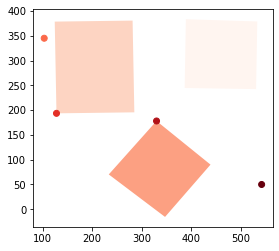

In [10]:
cap=cv2.VideoCapture(1,cv2.CAP_DSHOW)
for i in range (5):
    _, frame = cap.read()
    time.sleep(1)
    print("frame {}".format(i))

#cap.release()
#plt.figure()
#plt.imshow(frame)
#plt.show()

#time.sleep(1)
state=0
margin = 40
switch_next=0
path_iter=1
obst = [0,0,0]     # measurements from left, middle, right prox sensors
obstThrL = 2500      # low obstacle threshold to switch state 3->2
obstThrL2 = 3000
obstThrH = 4000      # high obstacle threshold to switch state 2->3 
y = [0,0]          # powers given to motor wheels

#init des variables Kalman, et visu de la trace
KF = ExtendedKalmanFilterAstolfi()
KF.set_time_stamp(time.time())

sensor_package = []
kalman_pos = []

coordThym = []
coordKalm = []

while (cap.isOpened()):
    _, frame = cap.read()
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    #final=vis.img_calibration(img, corner_coord)
    #img= cv2.flip(img, 0)
    if(state==0):
        corner_coord=vis.find_corners(img)
        final=vis.img_calibration(img, corner_coord)
        init=initialisation(final)
        path=glob.global_pathplanning(init[0],init[1],init[2],margin)
        
        init_pos = [init[0][0], init[0][1]]
        
        KF.init_state_vector(init_pos[0],init_pos[1],1.7,0,0,0,0,0)   #xxx a rendre plus joli
        angle_kalman = 1.7
        state=2
    #if state==1:
     #   time.sleep(6)
      #  print("time sleep over")
       # _, frame1 = cap.read()
        #plt.figure()
        #plt.imshow(frame1)
        #plt.show()
        #img1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
        #state=2
    if (state==2):
        final=vis.img_calibration(img, corner_coord)
        #plt.figure()
        #plt.imshow(final1)
        #plt.show()
        pos_thym=vis.detectThymio(final)[0]
        angle_thym=vis.directionThymio(final)
        
        vit_roue_droite = ctrl.read_motors_speed(node,client)[1]#xxx droite ou gauche a verifier
        vit_roue_gauche = ctrl.read_motors_speed(node,client)[0]#droite ou gauche a verifier
        sensor_package = [pos_thym[0], pos_thym[1], angle_thym, vit_roue_droite, vit_roue_gauche]
 #       print(sensor_package)
#       a modifier (augmenter pour etre plus souple)
        if(bool(angle_thym)):
            if(abs(angle_thym-angle_kalman)>0.4):
                print("trop grande différence d'angle detectée")
                sensor_package = [None, None, None, vit_roue_droite, vit_roue_gauche]
            else:
                print("différence d'angle correcte")
        E = kalman_step_complet(sensor_package,KF)
        kalman_pos = [E[0], E[1]]
        kalman_pos = np.squeeze(np.asarray(kalman_pos))
 #       print("kalman pos: {}".format(kalman_pos))
        print("angle from camera: {}".format(sensor_package[2]))

        print(type(kalman_pos[0]))
        angle_kalman=E[2]
        angle_kalman = np.squeeze(np.asarray(angle_kalman[0]))
 #       print("kalman angle: {}".format(angle_kalman))
        
        #print(pos_thym)
        #print(angle_thym)
        y = [60,60]
        ctrl.set_motors(y[0],y[1],node)
        
    #    switch_next=astolfi(kalman_pos,path[path_iter],angle_kalman,node)
        if(switch_next==1):
            path_iter=path_iter+1
            print("path iter ",path_iter)
            if(path_iter==len(path)):
                ctrl.stopmotors(node)
                print("finish")
                state=4
                
        #local avoidance
        # get the proximity sensors values and obstacle update
        #prox_horizontal = ctrl.read_prox_sensors(node,client)
        #obst = [prox_horizontal[0], prox_horizontal[2], prox_horizontal[4]]
        # update the state and speed motors values
        #state = local.update_state(state,obstThrL,obstThrH, obst)  
    if(state==3):
   #     print("local_nav")
        prox_horizontal = ctrl.read_prox_sensors(node,client)
        obst = [prox_horizontal[0], prox_horizontal[2], prox_horizontal[4]]
        state = local.update_state(state,obstThrL,obstThrH, obst)
  #      print("obstacles values", obst)
        y = local.local_nav(prox_horizontal,y)
   #     print("y ",y)
        ctrl.set_motors(y[0],y[1],node)
    if state==4:
        break
    vis.printGlobalPath(path, final)
   # printThymio(pos_thym, coordThym)
 #   print(kalman_pos)
 #   print(coordKalm)
    printThymioKalm(kalman_pos,coordKalm)
    cv2.imshow("results", final)
    if cv2.waitKey(1) & 0xFF ==ord('q'):
        break
        
cap.release()
#cv2.destroyAllWindows()

In [ ]:
cap=cv2.VideoCapture(1,cv2.CAP_DSHOW)
for i in range (5):
    _, frame = cap.read()
    time.sleep(1)
    print("frame {}".format(i))

#cap.release()
#plt.figure()
#plt.imshow(frame)
#plt.show()

#time.sleep(1)
state=0
margin = 40
switch_next=0
path_iter=1
obst = [0,0,0]     # measurements from left, middle, right prox sensors
obstThrL = 2500      # low obstacle threshold to switch state 3->2
obstThrL2 = 3000
obstThrH = 4000      # high obstacle threshold to switch state 2->3 
y = [0,0]          # powers given to motor wheels

#init des variables Kalman, et visu de la trace
KF = ExtendedKalmanFilterAstolfi()
KF.set_time_stamp(time.time())

sensor_package = []
kalman_pos = []

coordThym = []
coordKalm = []

while (cap.isOpened()):
    _, frame = cap.read()
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    #final=vis.img_calibration(img, corner_coord)
    #img= cv2.flip(img, 0)
    if(state==0):
        corner_coord=vis.find_corners(img)
        final=vis.img_calibration(img, corner_coord)
        init=initialisation(final)
        path=glob.global_pathplanning(init[0],init[1],init[2],margin)
        
        init_pos = [init[0][0], init[0][1]]
        
        KF.init_state_vector(init_pos[0],init_pos[1],1.7,0,0,0,0,0)   #xxx a rendre plus joli
        angle_kalman = 1.7 
        state=2
    #if state==1:
     #   time.sleep(6)
      #  print("time sleep over")
       # _, frame1 = cap.read()
        #plt.figure()
        #plt.imshow(frame1)
        #plt.show()
        #img1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
        #state=2
    if (state==2):
        final=vis.img_calibration(img, corner_coord)
        #plt.figure()
        #plt.imshow(final1)
        #plt.show()
        pos_thym=vis.detectThymio(final)[0]
        angle_thym=vis.directionThymio(final)
        
        vit_roue_droite = ctrl.read_motors_speed(node,client)[1]#xxx droite ou gauche a verifier
        vit_roue_gauche = ctrl.read_motors_speed(node,client)[0]#droite ou gauche a verifier
        sensor_package = [pos_thym[0], pos_thym[1], angle_thym, vit_roue_droite, vit_roue_gauche]
 #       print(sensor_package)
        if(bool(angle_thym)):
            if(abs(angle_thym-angle_kalman)>0.4):
                print("trop grande différence d'angle detectée")
                sensor_package = [None, None, None, vit_roue_droite, vit_roue_gauche]
            else:
                print("différence d'angle correcte")
        E = kalman_step_complet(sensor_package,KF)
        kalman_pos = [E[0], E[1]]
        kalman_pos = np.squeeze(np.asarray(kalman_pos))
 #       print("kalman pos: {}".format(kalman_pos))
        print(type(kalman_pos[0]))
        angle_kalman=E[2]
        angle_kalman = np.squeeze(np.asarray(angle_kalman[0]))
 #       print("kalman angle: {}".format(angle_kalman))
        
        #print(pos_thym)
        #print(angle_thym)
        #y = [50,50]
        #ctrl.set_motors(y[0],y[1],node)
        switch_next=astolfi(kalman_pos,path[path_iter],angle_kalman,node)
        if(switch_next==1):
            path_iter=path_iter+1
            print("path iter ",path_iter)
            if(path_iter==len(path)):
                ctrl.stopmotors(node)
                print("finish")
                state=4
                
        #local avoidance
        # get the proximity sensors values and obstacle update
        #prox_horizontal = ctrl.read_prox_sensors(node,client)
        #obst = [prox_horizontal[0], prox_horizontal[2], prox_horizontal[4]]
        # update the state and speed motors values
        #state = local.update_state(state,obstThrL,obstThrH, obst)  
    if(state==3):
   #     print("local_nav")
        prox_horizontal = ctrl.read_prox_sensors(node,client)
        obst = [prox_horizontal[0], prox_horizontal[2], prox_horizontal[4]]
        state = local.update_state(state,obstThrL,obstThrH, obst)
  #      print("obstacles values", obst)
        y = local.local_nav(prox_horizontal,y)
   #     print("y ",y)
        ctrl.set_motors(y[0],y[1],node)
    if state==4:
        break
    vis.printGlobalPath(path, final)
   # printThymio(pos_thym, coordThym)
 #   print(kalman_pos)
 #   print(coordKalm)
    printThymioKalm(kalman_pos,coordKalm)
    cv2.imshow("results", final)
    if cv2.waitKey(1) & 0xFF ==ord('q'):
        break
        
cap.release()
#cv2.destroyAllWindows()

In [ ]:
type(kalman_pos)
round(-10.939384)
print(kalman_pos)
print(round(kalman_pos[0]))
round(-294992929.8484)

In [ ]:
print("kalman pos: ",kalman_pos)
print("kalman pos: ", np.asarray(kalman_pos[0][0]))
print("kalman pos: ", np.squeeze(np.asarray(kalman_pos))[0])

In [10]:
ctrl.stopmotors(node)


In [ ]:
test=[[None,None],[None,None]]
if bool(not test[0][0]):
    print("zeub")

In [ ]:
def detectThymio(imgRGB):
    pts=[]
    #p1 is the big circle and p2 the little
    p1=[]
    p2=[]
    lower=np.array([10,30,30])
    upper=np.array([40,255,255])
    nb_iterations=1
    img_hsv = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(img_hsv, lower, upper)
    img_hsv = cv2.blur(img_hsv,(7,7))
    mask = cv2.erode(mask, None, iterations = nb_iterations)
    mask = cv2.dilate(mask, None, iterations = nb_iterations)
    elements,_ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    print(len(elements))
    if len(elements) > 0:
        #sorting the detected contours by descending area size
        elements.sort(key=cv2.contourArea, reverse=True)
        #finding big circle
        c=elements[0]
        ((x,y),rayon) = cv2.minEnclosingCircle(c)
        #finding little circle
        c2=elements[1]
        ((x2,y2),rayon2) = cv2.minEnclosingCircle(c2)
        p1=[x,y]
        p2=[x2,y2]
        pts=[p1,p2]
    return pts

#print(detectThymio(final))
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
corner_coord=vis.find_corners(frame)
final=vis.img_calibration(frame, corner_coord)
print(detectThymio(final)[0])

In [ ]:
print(init)

In [ ]:
# Navigation initialisation
checkp=1           # goal checkpoint
actual_angle=0     # angle to xy axis
y = [0,0]          # powers given to motor wheels

# FSM initialisation
state = 0          # States FSM 0=global nav, 1=local nav
obst = [0,0,0]     # measurements from left, middle, right prox sensors
obstThrL = 2500      # low obstacle threshold to switch state 1->0
obstThrL2 = 3000
obstThrH = 4000      # high obstacle threshold to switch state 0->1  

while True:
    
    # get the proximity sensors values and obstacle update
    prox_horizontal = ctrl.read_prox_sensors(node,client)
    obst = [prox_horizontal[0], prox_horizontal[2], prox_horizontal[4]]
    
    # update the state and speed motors values
    state = local.update_state(state,obstThrL,obstThrH, obst)
    y = ctrl.read_motors_speed(node,client)
    
    print("state", state)

    if state == 0:
        
        """
        # With positon estimation when vision and/or kalman ready
        
        actual,angle = getting_vis()
        pred_pos,pred_angle = kalman(actual, angle)
        
        actual_pos=pred_pos
        actual_angle=pred_angle
        
        if actual_pos == checkpoints[checkp]: # other option: if (actual_pos - checkpoints[checkp]) < error
            checkp=checkp+1
        goal_pos=checkpoints[checkp]
        
        y = ctrl.astolfi2(actual_pos, goal_pos, actual_angle, node)
        
        """
        y = [50,50]
        ctrl.set_motors(y[0],y[1],node)

    elif state == 1:
        print("obstacles values", obst)
        y = local.local_nav(prox_horizontal,y)
        print("y ",y)
        ctrl.set_motors(y[0],y[1],node)

ctrl.stopmotors(node)

In [11]:
ctrl.stopmotors(node)
